# LSTM for Language Detection
---
Authors:                                                                                                               Madhulekha Arunmozhi and Kiran Sudhir

## Part 1 -- Building String Scoring LSTM Models

In [1]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop,SGD,Adadelta
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys

Using TensorFlow backend.


#### Reading English Language

In [2]:
text_eng = open('../data/eng.txt').read().lower()
print('english corpus length:', len(text_eng))
chars_eng = sorted(list(set(text_eng)))
print('total chars english :', len(chars_eng))
char_indices_eng = dict((c, i) for i, c in enumerate(chars_eng))
indices_char_eng = dict((i, c) for i, c in enumerate(chars_eng))

english corpus length: 10746
total chars english : 43


#### Reading French Language

In [3]:
text_frn = open('../data/frn.txt').read().lower()
print('french corpus length:', len(text_frn))
chars_frn = sorted(list(set(text_frn)))
print('total chars french :', len(chars_frn))
char_indices_frn = dict((c, i) for i, c in enumerate(chars_frn))
indices_char_frn = dict((i, c) for i, c in enumerate(chars_frn))

french corpus length: 12009
total chars french : 41


#### Combining both the character sets

In [4]:
chars = set(chars_eng)
chars = sorted(list(chars.union(set(chars_frn))))
print('total chars :', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

total chars : 44


#### Splitting corpus into 80% Training and 20% Testing 

In [5]:
text_eng_train = text_eng[:int(0.8*len(text_eng))]
text_eng_test = text_eng[int(0.8*len(text_eng)):]
text_frn_train = text_frn[:int(0.8*len(text_frn))]
text_frn_test = text_frn[int(0.8*len(text_frn)):]

#### Function to split the train corpus into sentences

In [6]:
def get_sentences(text, maxlen, step):
    sentences = []
    next_chars = []
    for i in range(0, len(text) - maxlen, step):
        sentences.append(text[i: i + maxlen])
        next_chars.append(text[i + maxlen])
    #print('nb sequences:', len(sentences_eng))
    return sentences, next_chars

In [41]:
maxlen = 5
step = 1
sentences_eng, next_chars_eng = get_sentences(text_eng_train, maxlen, step)
sentences_frn, next_chars_frn = get_sentences(text_frn_train, maxlen, step)

#### Function to split the test corpus into sentences

In [42]:
def get_sentences_test(text, maxlen, step):
    sentences = []
    next_string = []
    for i in range(0, len(text) - maxlen, step):
        sentences.append(text[i: i + maxlen])
        next_string.append(text[i + maxlen:i + maxlen +5])
    return sentences, next_string

In [44]:
maxlen = 5
step = 20
sentences_eng_test, next_string_eng_test = get_sentences_test(text_eng_test, maxlen, step)
sentences_frn_test, next_string_frn_test = get_sentences_test(text_frn_test, maxlen, step)

#### Taking only 100 5 character strings from english and french test corpus

In [45]:
sentences_eng_test = sentences_eng_test[:100]
next_string_eng_test = next_string_eng_test[:100]
sentences_frn_test = sentences_frn_test[:100]
next_string_frn_test = next_string_frn_test[:100]

#### Converting sentences to vectors

In [46]:
def get_vectors(sentences, chars, char_indices, next_chars):
    X = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
    y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
    for i, sentence in enumerate(sentences):
        for t, char in enumerate(sentence):
            X[i, t, char_indices[char]] = 1
        y[i, char_indices[next_chars[i]]] = 1
    return X,y

In [47]:
X_eng, y_eng = get_vectors(sentences_eng, chars, char_indices, next_chars_eng)
X_frn, y_frn = get_vectors(sentences_frn, chars, char_indices, next_chars_frn)

#### Shape of english model training set

In [48]:
print ("Shape of X Eng",X_eng.shape)
print ("Shape of Y Eng",y_eng.shape)
print ("Shape of X Frn",X_frn.shape)
print ("Shape of Y Frn",y_frn.shape)

Shape of X Eng (8591, 5, 44)
Shape of Y Eng (8591, 44)
Shape of X Frn (9602, 5, 44)
Shape of Y Frn (9602, 44)


#### LSTM Model building

In [49]:
def build_model(chars, maxlen, X, y, name):
    model = Sequential()
    model.add(LSTM(128, input_shape=(maxlen, len(chars))))
    model.add(Dense(len(chars)))
    model.add(Activation('softmax'))
    optimizer = RMSprop(lr=0.01)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.fit(X, y, batch_size=128, epochs=20)
    model.save(name)
    return model

In [50]:
model_eng = build_model(chars, maxlen, X_eng, y_eng, 'eng.h5')
model_frn = build_model(chars, maxlen, X_frn, y_frn, 'frn.h5')

Epoch 1/20
8591/8591 [==============================] - 3s - loss: 2.6823 - acc: 0.2503     
Epoch 2/20
8591/8591 [==============================] - 2s - loss: 2.0585 - acc: 0.4162     
Epoch 3/20
8591/8591 [==============================] - 3s - loss: 1.7529 - acc: 0.4898     
Epoch 4/20
8591/8591 [==============================] - 3s - loss: 1.5503 - acc: 0.5470     
Epoch 5/20
8591/8591 [==============================] - 3s - loss: 1.3785 - acc: 0.5919     
Epoch 6/20
8591/8591 [==============================] - 2s - loss: 1.2300 - acc: 0.6303     
Epoch 7/20
8591/8591 [==============================] - 2s - loss: 1.1060 - acc: 0.6617     
Epoch 8/20
8591/8591 [==============================] - 3s - loss: 1.0019 - acc: 0.6931     
Epoch 9/20
8591/8591 [==============================] - 3s - loss: 0.9113 - acc: 0.7217     
Epoch 10/20
8591/8591 [==============================] - 2s - loss: 0.8331 - acc: 0.7395     
Epoch 11/20
8591/8591 [==============================] - 3s - loss: 0

#### Get vector for test set

In [51]:
def get_vector(sentence, chars , char_indices ):
    X = np.zeros((1, maxlen, len(chars)), dtype=np.bool)
    for t, char in enumerate(sentence):
        X[0, t, char_indices[char]] = 1
    return X

In [52]:
X_test = sentences_eng_test + sentences_frn_test
Y_test = next_string_eng_test + next_string_frn_test
y_true = ([1] * 100) + ([0] * 100) #1 for English, 0 for French

In [53]:
print("Shape of X_test :",len(X_test),len(X_test[0]))
print("Shape of Y_test :",len(Y_test),len(Y_test[0]))
print("Shape of Y_true :",len(y_true),1)

Shape of X_test : 200 5
Shape of Y_test : 200 5
Shape of Y_true : 200 1


In [54]:
from keras import models
model_eng = models.load_model('eng.h5')
model_frn = models.load_model('frn.h5')

#### Prediction of each of the 5 character

In [57]:
def get_predictions(model, X_test,Y_test, chars, indices_char):
    y_true_list = []
    y_pred_list = []
    prob_list = []

    for i in range(len(X_test)):
        term = X_test[i]
        termy = Y_test[i]
        x = np.zeros((5, maxlen, len(chars)))
        
        for i in range(5):
            x[i] = get_vector(term[i:]+termy[:i],chars,char_indices) 

        term_probs = []
        for i in range(5):
            preds = model.predict(x[i].reshape(1,5,44), verbose=0)[0]
            term_probs.append(preds[char_indices[termy[i]]])
        
        prob_list.append(term_probs)
        
    return prob_list

In [58]:
y_prob_eng = get_predictions(model_eng, X_test,Y_test ,chars, indices_char)
y_prob_frn = get_predictions(model_frn, X_test,Y_test ,chars, indices_char)

#### Predicting if it is english or french

In [59]:
def predict_language(prob_eng, prob_frn):
    y = [1] * len(prob_eng)
    probs_eng = []
    probs_frn = []
    for i in range(len(prob_eng)):
        sum_eng = 0
        sum_frn = 0
        for j in range(len(prob_eng[0])):
            sum_eng += np.log(prob_eng[i][j])
            sum_frn += np.log(prob_frn[i][j])
        #print (sum_eng,sum_frn)
        sum_eng = np.exp(sum_eng)
        sum_frn = np.exp(sum_frn)
        if sum_eng < sum_frn:
            y[i] = 0
        probs_eng.append(sum_eng)
        probs_frn.append(sum_frn)
    return y, probs_eng, probs_frn

## ROC in log scale

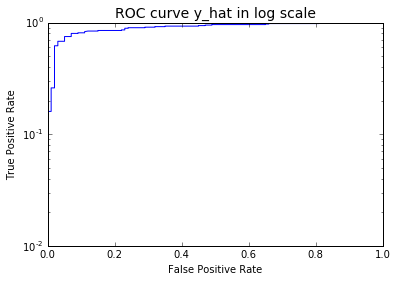

Accuracy :  0.855
ROC AUC Score  0.91185


In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

y_pred, probs_eng, probs_frn = predict_language(y_prob_eng, y_prob_frn)
y_hat = [ prob_eng - prob_frn for prob_eng, prob_frn in zip(probs_eng, probs_frn)]

fpr, tpr, thresholds = roc_curve(y_true, y_hat)
plt.title('ROC curve y_hat in log scale',fontsize=14)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.yscale('log')
plt.plot(fpr, tpr)
plt.show()

print ("Accuracy : ",accuracy_score(y_true, y_pred))
print("ROC AUC Score ", roc_auc_score(y_true, y_hat))

## ROC in normal scale

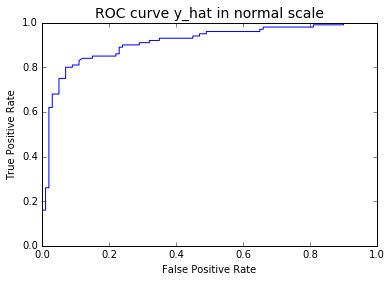

Accuracy :  0.855
ROC AUC Score  0.91185


In [61]:
fpr, tpr, thresholds = roc_curve(y_true, y_hat)
plt.title('ROC curve y_hat in normal scale',fontsize=14)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr, tpr)
plt.show()

print ("Accuracy : ",accuracy_score(y_true, y_pred))
print("ROC AUC Score ", roc_auc_score(y_true, y_hat))

## Confusion matrix

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix 
acc = []
def plot_confusion_matrix(actual,pred):
    acc.append(accuracy_score(actual,pred))
    print ("\nThe overall accuracy score is : ",acc[-1],"\n")
    def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(2)
        plt.xticks(tick_marks, rotation=45)
        plt.yticks(tick_marks)
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

    cm = confusion_matrix(actual,pred)
    np.set_printoptions(precision=2)
    print('Confusion matrix')
    print(cm)
    plt.figure()
    plot_confusion_matrix(cm)  


The overall accuracy score is :  0.855 

Confusion matrix
[[89 11]
 [18 82]]


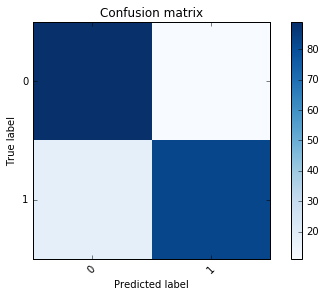

In [63]:
plot_confusion_matrix(y_true, y_pred)

## Part 2 -- Additional experiments


## Experiment 1 - Language detector by classification using LSTM

Instead of string scoring and creating one model for each language and then creating a binary classifier over them we wanted to combine the corpus and create a LSTM binary classifier over it. The features for the LSTM is a list of 5 sets of words each of them converted to a vector of length 100. The dimension is (None , 5 , 100 ) . Both of the corpuses was preprocessed and split into 80% train 20% test. The train set was converted to sentences using nltk tokenizers and the words were preprocessed using beautiful soup. These sentences were then used to create a gensim word2vec model. The words from both the corpus was then converted to 5 sets of words with Y = 1 for english and Y = 0 for french.

In [64]:
from bs4 import BeautifulSoup 
import nltk
import pandas as pd
from bs4 import BeautifulSoup
import re
import numpy as np
from gensim.models import Word2Vec,KeyedVectors
pd.set_option('max_colwidth',400)
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

#### Make sentence into words

In [65]:
def get_words( corpus ):
    corpus_text = BeautifulSoup(corpus,"lxml").get_text()
    words = corpus_text.lower().split()
    return(words)

#### Make corpus into sentences

In [66]:
def get_sentences( corpus , lang):
    if(lang == 'eng'):
        tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    else:
        tokenizer = nltk.data.load('tokenizers/punkt/french.pickle')     
    raw_sentences = tokenizer.tokenize(corpus.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append( get_words( raw_sentence ))
    return sentences

#### Sentences to train the models

In [67]:
sentences_eng = get_sentences(text_eng_train,'eng')
sentences_frn = get_sentences(text_frn_train,'frn')

#### Forming the Train and Test data

In [71]:
words_eng_train = get_words(text_eng_train)
words_frn_train = get_words(text_frn_train)
words_eng_test = get_words(text_eng_test)
words_frn_test = get_words(text_frn_test)

## Word2Vec for English Model 

In [68]:
context = 5   
embedding_dimension = 100                    
min_words = 1                                                                                                             
model_eng = Word2Vec(sentences_eng, size = embedding_dimension, min_count = min_words, window = context)
model_eng.init_sims(replace=True)
Z_eng = model_eng.wv.syn0
print ("Shape of Z : ", Z_eng.shape)

Shape of Z :  (519, 100)


In [69]:
dict_word_vec_eng = {}
i = 0
for key in model_eng.wv.index2word:
    dict_word_vec_eng[key]=Z_eng[i]
    i+=1

#### Converting list of 5 words to list of 5 vectors - train

In [72]:
i = 0
x_five_words_eng_train = []
for i in range(len(words_eng_train)):
    if(i+1<len(words_eng_train)):
        temp_five=[]
        for j in range(i,i+1):
            temp_five.append(dict_word_vec_eng[words_eng_train[j]])           
        x_five_words_eng_train.append(temp_five)

#### Converting list of 5 words to list of 5 vectors - test

In [73]:
i = 0
x_five_words_eng_test = []
c_eng_miss = 0
flag = 0
for i in range(len(words_eng_test)):
    if(i+1<len(words_eng_test)):
        temp_five=[]
        for j in range(i,i+1):
            if(words_eng_test[j] in dict_word_vec_eng):
                temp_five.append(dict_word_vec_eng[words_eng_test[j]]) 
            else:
                c_eng_miss+=1
                #print (words_eng_test[j])
        if(len(temp_five)==1):
            x_five_words_eng_test.append(temp_five)

## Word2Vec for French Model

In [74]:
context = 5   
embedding_dimension = 100                    
min_words = 1                                                                                                             
model_frn = Word2Vec(sentences_frn, size = embedding_dimension, min_count = min_words, window = context)
model_frn.init_sims(replace=True)
Z_frn = model_frn.wv.syn0
print ("Shape of Z : ", Z_frn.shape)

Shape of Z :  (606, 100)


In [75]:
dict_word_vec_frn = {}
i = 0
for key in model_frn.wv.index2word:
    dict_word_vec_frn[key]=Z_frn[i]
    i+=1

#### Converting list of 5 words to list of 5 vectors - train

In [76]:
i = 0
x_five_words_frn_train = []
for i in range(len(words_frn_train)):
    if(i+1<len(words_frn_train)):
        temp_five=[]
        for j in range(i,i+1):
            temp_five.append(dict_word_vec_frn[words_frn_train[j]])           
        x_five_words_frn_train.append(temp_five)

#### Converting list of 5 words to list of 5 vectors - test

In [77]:
i = 0
c_frn_miss = 0
x_five_words_frn_test = []
for i in range(len(words_frn_test)):
    if(i+1<len(words_frn_test)):
        temp_five=[]
        for j in range(i,i+1):
            if(words_frn_test[j] in dict_word_vec_frn):
                temp_five.append(dict_word_vec_frn[words_frn_test[j]]) 
            else:
                c_frn_miss+=1
        if(len(temp_five)==1):
            x_five_words_frn_test.append(temp_five)

#### Creating train and test from both english and french corpus

In [78]:
y_train = [1]*len(x_five_words_eng_train)+[0]*len(x_five_words_frn_train)
y_test = [1]*len(x_five_words_eng_test)+[0]*len(x_five_words_frn_test)
y_train = np.array(y_train)
testY = np.array(y_test)

In [79]:
x_train = x_five_words_eng_train + x_five_words_frn_train
x_train = np.array(x_train)
x_test = x_five_words_eng_test + x_five_words_frn_test
testX = np.array(x_test)

In [80]:
from sklearn.utils import shuffle
trainX, trainY = shuffle(x_train, y_train, random_state=0)

#### Building model 

In [81]:
def build_model_2(maxlen, X, y):
    model = Sequential()
    model.add(LSTM(128, input_shape=(1,100)))
    #model.add(Dense(1))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])
    model.fit(X, y, batch_size=128, epochs=20)
    return model

In [82]:
model_2 = build_model_2(1, trainX, trainY)

Epoch 1/20
3007/3007 [==============================] - 1s - loss: 0.6750 - acc: 0.8081     
Epoch 2/20
3007/3007 [==============================] - 0s - loss: 0.6360 - acc: 0.8916     
Epoch 3/20
3007/3007 [==============================] - 0s - loss: 0.5847 - acc: 0.9102     
Epoch 4/20
3007/3007 [==============================] - 0s - loss: 0.5184 - acc: 0.9172     
Epoch 5/20
3007/3007 [==============================] - 0s - loss: 0.4437 - acc: 0.9242     
Epoch 6/20
3007/3007 [==============================] - 0s - loss: 0.3740 - acc: 0.9278     
Epoch 7/20
3007/3007 [==============================] - 0s - loss: 0.3184 - acc: 0.9308     
Epoch 8/20
3007/3007 [==============================] - 0s - loss: 0.2778 - acc: 0.9342     
Epoch 9/20
3007/3007 [==============================] - 0s - loss: 0.2486 - acc: 0.9345     
Epoch 10/20
3007/3007 [==============================] - 0s - loss: 0.2275 - acc: 0.9352     
Epoch 11/20
3007/3007 [==============================] - 0s - loss: 0

In [83]:
preds = model_2.predict(testX, verbose=0)
pred_y = [1 if pred>0.5 else 0 for pred in preds]
print ("Accuracy",accuracy_score(testY.tolist(), pred_y))

Accuracy 0.959107806691


## Experiment 2 - NGrams
Here, we used N-grams for language detection. We generate n-grams from the training data and use them as language profiles. We then generate n-grams from the test data, which constitutes the document profile. We compare the document profile with each language profile and choose the language that has the minimum distance from the language profile.

#### Generating N-grams
Given a set of tokens, N-grams are generated ror N = 1 to 5.

In [1]:
from nltk.util import ngrams
def generate_ngrams(tokens):

    generated_ngrams = []

    for token in tokens:
        
        for x in range(1, 6): # generate N-grams, for N=1 to 5
            xngrams = ngrams(token, x)

            for xngram in xngrams:
                # convert ('E', 'X', 'T', ' ') to 'EXT '
                ngram = ''.join(xngram)
                generated_ngrams.append(ngram)

    return generated_ngrams

#### Creating a mapping of N-Grams to counts
This is used to build the language and document profiles

In [2]:
from nltk.tokenize import RegexpTokenizer
import operator
def calculate_ngram_occurrences(text):

    tokenizer = RegexpTokenizer("[a-zA-Z'`éèî]+")
    tokens = tokenizer.tokenize(text)
    ngrams_list = generate_ngrams(tokens)

    ngrams_statistics = {}

    for ngram in ngrams_list:
        if ngram not in ngrams_statistics:
            ngrams_statistics.update({ngram:1})
        else:
            ngram_occurrences = ngrams_statistics[ngram]
            ngrams_statistics.update({ngram:ngram_occurrences+1})

    ngrams_statistics_sorted = sorted(ngrams_statistics.items(),\
                                      key=operator.itemgetter(1),\
                                      reverse=True)[0:300]

    return ngrams_statistics_sorted

#### Loading the data and creating language profiles

In [3]:
text_eng = open('../data/eng.txt', mode='r').read()
text_frn = open('../data/frn.txt', mode='r').read()
text_eng_train = text_eng[:int(0.8*len(text_eng))]
text_eng_test = text_eng[int(0.8*len(text_eng)):]
text_frn_train = text_frn[:int(0.8*len(text_frn))]
text_frn_test = text_frn[int(0.8*len(text_frn)):]

In [4]:
# Create English profile
profile_ngrams_sorted = calculate_ngram_occurrences(text_eng_train)
fd = open('../data/ngrams-eng.dat', mode='w')
for ngram in profile_ngrams_sorted:
    fd.write('%s\t%s\n' % (ngram[0], ngram[1]))
fd.close()

/Users/kiran/python_3/lib/python3.6/site-packages/ipykernel/__main__.py:11: DeprecationWarning: generator 'ngrams' raised StopIteration


In [5]:
# Create French profile
profile_ngrams_sorted = calculate_ngram_occurrences(text_frn_train)
fd = open('../data/ngrams-frn.dat', mode='w')
for ngram in profile_ngrams_sorted:
    fd.write('%s\t%s\n' % (ngram[0], ngram[1]))
fd.close()

/Users/kiran/python_3/lib/python3.6/site-packages/ipykernel/__main__.py:11: DeprecationWarning: generator 'ngrams' raised StopIteration


#### Comparing language profile with document profile
The distance is calculated by summing up the difference in the indices of each N-gram in the sorted document profile and its corresponding N-gram in the sorted language profile. If a particular N-gram is not present in the language profile, the distance is set to a fixed maximum out-of-place value.

In [6]:
def compare_ngram_frequency_profiles(category_profile, document_profile):

    document_distance = 0

    # convert [['eas ', 487], ['going', 437], ...] to ['eas', 'going', ...]
    category_ngrams_sorted = [ngram[0] for ngram in category_profile]
    document_ngrams_sorted = [ngram[0] for ngram in document_profile]

    maximum_out_of_place_value = len(document_ngrams_sorted)

    for ngram in document_ngrams_sorted:
        # pick up index position of ngram
        document_index = document_ngrams_sorted.index(ngram)
        try:
            # check if analyzed ngram exists in pre-computed category
            category_profile_index = category_ngrams_sorted.index(ngram)
        except ValueError:
            #If an N-gram is not in the category profile,
            #it takes some maximum out-of-place value.
            category_profile_index = maximum_out_of_place_value

        distance = abs(category_profile_index-document_index)
        document_distance+=distance

    return document_distance

#### Detecting language
The language of a document is detected by finding its distance to each language and choosing the one corresponding to the minimum distance.

In [7]:
def guess_language(raw_text):
    
    languages_ratios = {}
    languages_statistics = {}

    ngram_statistics = open('../data/ngrams-eng.dat', mode='r').readlines()
    ngram_statistics = map(str.rstrip, ngram_statistics) # remove edge trailing
    languages_statistics.update({'1':ngram_statistics})

    ngram_statistics = open('../data/ngrams-frn.dat', mode='r').readlines()
    ngram_statistics = map(str.rstrip, ngram_statistics) # remove edge trailing
    languages_statistics.update({'0':ngram_statistics})

    for language, ngrams_statistics in languages_statistics.items():
        language_ngram_statistics = calculate_ngram_occurrences(raw_text)
        distance = compare_ngram_frequency_profiles(ngrams_statistics, language_ngram_statistics)

        languages_ratios.update({language:distance})

    nearest_language = min(languages_ratios, key=languages_ratios.get)

    return nearest_language

#### Tokenizing the test data and detecting its language

In [8]:
import nltk.data

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
sentences_eng_test = tokenizer.tokenize(text_eng_test)

tokenizer = nltk.data.load('tokenizers/punkt/french.pickle')
sentences_frn_test = tokenizer.tokenize(text_frn_test)

In [9]:
#removing sentences like '1.', '2.' etc.
sentences_eng_test = [x for x in sentences_eng_test if len(x) > 2]
sentences_frn_test = [x for x in sentences_frn_test if len(x) > 2]

X_test = sentences_eng_test + sentences_frn_test
y_true = ([1] * len(sentences_eng_test)) + ([0] * len(sentences_frn_test)) #1 for English, 0 for French

In [10]:
y_pred = []
for line in X_test:
    y_pred.append(int(guess_language(line)))

/Users/kiran/python_3/lib/python3.6/site-packages/ipykernel/__main__.py:11: DeprecationWarning: generator 'ngrams' raised StopIteration


In [11]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true, y_pred))

0.888888888889


## Experiment 3 -Stop Words
We also tried out a very simple approach that uses stop words to detect language.

#### Language detection with stopwords
The input text is first tokenized using NLTK's wordpunct_tokenize method, which in addition to tokenizing the words, will also split up punctuations into tokens.
The tokenized input is then compared to the stopwords (obtained from NLTK) for each language, and the language with the highest number of common stopwords with the input text is chosen.

In [12]:
from nltk import wordpunct_tokenize
from nltk.corpus import stopwords

def detect_language(text):
    languages_ratios = {}
    tokens = wordpunct_tokenize(text)
    words = [word.lower() for word in tokens]
    languages = ['english', 'french']

    for language in languages:
        stopwords_set = set(stopwords.words(language))
        words_set = set(words)
        common_elements = words_set.intersection(stopwords_set)

        languages_ratios[language] = len(common_elements)

    most_rated_language = max(languages_ratios, key = languages_ratios.get)

    return most_rated_language

In [13]:
y_pred = []
for sentence in X_test:
    language = detect_language(sentence)
    if language == 'english':
        y_pred.append(1)
    else:
        y_pred.append(0)

In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true, y_pred))

0.888888888889


## Experiment 4 - Bag of Words
We converted the sentences into feature vectors using the Bag of Words model, and used it for language detection.

#### Reading the data
Both the train and test data are split into sentences.

In [18]:
import nltk.data

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
sentences_eng_test = tokenizer.tokenize(text_eng_test)
sentences_eng_train = tokenizer.tokenize(text_eng_train)

tokenizer = nltk.data.load('tokenizers/punkt/french.pickle')
sentences_frn_test = tokenizer.tokenize(text_frn_test)
sentences_frn_train = tokenizer.tokenize(text_frn_train)

In [19]:
sentences_eng_test = [x for x in sentences_eng_test if len(x) > 2]
sentences_frn_test = [x for x in sentences_frn_test if len(x) > 2]
sentences_eng_train = [x for x in sentences_eng_train if len(x) > 2]
sentences_frn_train = [x for x in sentences_frn_train if len(x) > 2]

X_test = sentences_eng_test + sentences_frn_test
X_train = sentences_eng_train + sentences_frn_train
X_train = sentences_eng_train + sentences_frn_train
y_test = ([1] * len(sentences_eng_test)) + ([0] * len(sentences_frn_test)) #1 for English, 0 for French
y_train = ([1] * len(sentences_eng_train)) + ([0] * len(sentences_frn_train))

#### Generating feature vectors using Bag of Words

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

print("Creating the bag of words")      
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 5000) 
train_data_features = vectorizer.fit_transform(X_train)
X_bow_train = train_data_features.toarray()
test_data_features = vectorizer.transform(X_test)
X_bow_test = test_data_features.toarray()

Creating the bag of words


#### Training a RandomForest classifier with the generated feature vectors

In [21]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100) 
forest = forest.fit( X_bow_train, y_train )

#### Language detection
This is treated as a simple classification task, where label 1 represents English and 0 represents French.

In [22]:
y_predict = forest.predict(X_bow_test)

In [23]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_predict))

0.916666666667
